# Simple Regret Leaderboard

In [1]:
#!pip install --upgrade PyXAB

In [2]:
from PyXAB.synthetic_obj import *
from PyXAB.algos import *

from PyXAB.partition.BinaryPartition import BinaryPartition

import PyXAB
import matplotlib.pyplot as plt
import numpy as np

Define the main function

In [3]:

def main(algo_name, target, domain, partition, noise=0.1, rounds=1000):
    algo_dictionary = {
        "T-HOO": HOO.T_HOO(rounds=rounds, domain=domain, partition=partition),
        "HCT": HCT.HCT(domain=domain, partition=partition),
        "VHCT": VHCT.VHCT(domain=domain, partition=partition),
        "POO": POO.POO(
            rounds=rounds, domain=domain, partition=partition, algo=HOO.T_HOO
        ),
        "PCT": PCT.PCT(rounds=rounds, domain=domain, partition=partition),
        "VPCT": VPCT.VPCT(rounds=rounds, domain=domain, partition=partition),
        #'SOO': SOO.SOO(n=rounds, domain=domain, partition=partition),
        'DOO': DOO.DOO(n=rounds, domain=domain, partition=partition),
        'StoSOO': StoSOO.StoSOO(n=rounds, domain=domain, partition=partition),
        'StroquOOL': StroquOOL.StroquOOL(n=rounds, domain=domain, partition=partition),
        'SequOOL': SequOOL.SequOOL(n=rounds, domain=domain, partition=partition)
    }

    print(algo_name, ": training")
    algo = algo_dictionary[algo_name]
    for t in range(1, rounds + 1):
        point = algo.pull(t)
        reward = target.f(point) + np.random.uniform(-noise, noise)
        algo.receive_reward(t, reward)
        
    p = algo.get_last_point()
    inst_regret = target.fmax - target.f(p)
    print(inst_regret)
    return inst_regret

Define the plot function

In [4]:

def compare_regret_withsd(ax, rounds, dictionary):
    regret = dictionary["regret"]
    colors = dictionary["colors"]
    labels = dictionary["labels"]

    for i in range(len(regret)):
        regret_array = regret[i]
        mean = np.mean(regret_array, axis=0)
        std = np.std(regret_array, axis=0)
        ax.plot(rounds, mean, linewidth=2, color=colors[i], label=labels[i], alpha=0.9)
        l = ax.fill_between(rounds, mean + 1 * std, mean - 1 * std, color=colors[i], alpha=0.3)
    
    ax.set_xlabel(dictionary['target'])
    # ax.set_ylim((0, 0.2))
    return l

# Noisy Setting

objective:  Garland
VHCT : training
0.08375505559696539
VHCT : training
0.09060766244371432
VHCT : training
0.15905853650337298
VHCT : training
0.08426076649981318
VHCT : training
0.0671822968964082
VHCT : training
0.12064532021318697
VHCT : training
0.12064532021318697
VHCT : training
0.17043972284398812
VHCT : training
0.08426076649981318
VHCT : training
0.0671822968964082
VHCT : training
0.12064532021318697
VHCT : training
0.12064532021318697
VHCT : training
0.02673538447768209
VHCT : training
0.09060766244371432
VHCT : training
0.0671822968964082
VHCT : training
0.12422959299575875
VHCT : training
0.10095740374573048
VHCT : training
0.12422959299575875
VHCT : training
0.09060766244371432
VHCT : training
0.0671822968964082
VHCT : training
0.12422959299575875
VHCT : training
0.12422959299575875
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.043731981942552456
VHCT : training
0.12064532021318697
VHCT : training
0.12064532021318697
VHCT : trai

VPCT : training
0.02673538447768209
VPCT : training
0.02673538447768209
VPCT : training
0.09995942281070502
VPCT : training
0.02673538447768209
VPCT : training
0.09995942281070502
VPCT : training
0.02673538447768209
VPCT : training
0.02673538447768209
VPCT : training
0.09995942281070502
VPCT : training
0.02673538447768209
VPCT : training
0.02673538447768209
VPCT : training
0.09995942281070502
VPCT : training
0.02673538447768209
VPCT : training
0.09995942281070502
VPCT : training
0.09995942281070502
VPCT : training
0.09995942281070502
VPCT : training
0.02673538447768209
VPCT : training
0.02673538447768209
StoSOO : training
0.02673538447768209
StoSOO : training
0.07563340802429552
StoSOO : training
0.07563340802429552
StoSOO : training
0.11433138391245146
StoSOO : training
0.13214474125139597
StoSOO : training
0.1419814395752209
StoSOO : training
0.08375505559696539
StoSOO : training
0.07563340802429552
StoSOO : training
0.08656173046709825
StoSOO : training
0.05082885352097921
StoSOO : 

0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302
PCT : training
0.17491571737108302


0.19170388919013404
StroquOOL : training
0.36499999999999994
StroquOOL : training
0.36499999999999994
StroquOOL : training
0.19170388919013404
StroquOOL : training
0.2695000000000001
StroquOOL : training
0.19170388919013404
StroquOOL : training
0.36499999999999994
StroquOOL : training
0.36499999999999994
StroquOOL : training
0.19170388919013404
StroquOOL : training
0.19170388919013404
StroquOOL : training
0.19170388919013404
StroquOOL : training
0.36499999999999994
StroquOOL : training
0.36499999999999994
StroquOOL : training
0.19170388919013404
StroquOOL : training
0.19170388919013404
StroquOOL : training
0.19170388919013404
objective:  Himmelblau
VHCT : training
0.017827494760577597
VHCT : training
0.005170586403836025
VHCT : training
0.011008273349719102
VHCT : training
0.14452713527036518
VHCT : training
0.005581957570622477
VHCT : training
0.04936826898810569
VHCT : training
0.04390116487995962
VHCT : training
0.047251926379257375
VHCT : training
0.005641706873861591
VHCT : traini

0.007964487825886588
VPCT : training
0.0010931465063202248
VPCT : training
0.00470562195510007
VPCT : training
0.012943567854634831
VPCT : training
0.007469348693161868
VPCT : training
0.018671271506320225
VPCT : training
0.012943567854634831
VPCT : training
0.005170586403836025
VPCT : training
0.010467872191011236
VPCT : training
0.006008876843398877
VPCT : training
0.008137563641151686
VPCT : training
0.001663722349016854
VPCT : training
0.008137563641151686
VPCT : training
0.008137563641151686
VPCT : training
0.022006945663623597
VPCT : training
0.007964487825886588
VPCT : training
0.0030462715063202246
VPCT : training
0.001663722349016854
VPCT : training
0.0030462715063202246
VPCT : training
0.005170586403836025
VPCT : training
0.001663722349016854
VPCT : training
0.007057875729678722
VPCT : training
0.007964487825886588
VPCT : training
0.007057875729678722
VPCT : training
0.005170586403836025
VPCT : training
0.006008876843398877
VPCT : training
0.006008876843398877
VPCT : training

0.022892002231547224
HCT : training
0.41486340816161116
HCT : training
0.41486340816161116
HCT : training
0.3702695217313993
HCT : training
0.23736655894382722
HCT : training
0.19621966096146579
HCT : training
0.41486340816161116
HCT : training
0.41486340816161116
HCT : training
0.23736655894382722
HCT : training
0.3702695217313993
HCT : training
0.19621966096146579
HCT : training
0.41486340816161116
HCT : training
0.41486340816161116
HCT : training
0.3780681289501762
HCT : training
0.17000160084407648
HCT : training
0.41486340816161116
HCT : training
0.19621966096146579
HCT : training
0.41486340816161116
HCT : training
0.3702695217313993
HCT : training
0.07530065885261591
PCT : training
0.3537162969827127
PCT : training
0.14449936747321418
PCT : training
0.055636688181115015
PCT : training
0.055636688181115015
PCT : training
0.055636688181115015
PCT : training
0.6536555654926858
PCT : training
0.5400419531599285
PCT : training
0.055636688181115015
PCT : training
0.055636688181115015
P

0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.14449936747321418
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.14449936747321418
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.14449936747321418
StroquOOL : training
0.6182226312217415
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.6182226312217415
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.6182226312217415
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.6182226312217415
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : training
0.3537162969827127
StroquOOL : traini

0.16597785940672627
VPCT : training
0.004828093961692393
VPCT : training
0.30506527312217846
VPCT : training
0.2515625
VPCT : training
0.16597785940672627
VPCT : training
0.028265593961692436
VPCT : training
0.028265593961692436
VPCT : training
0.004828093961692393
VPCT : training
0.07361392970336311
VPCT : training
0.025428671847575756
VPCT : training
0.32517642970336313
VPCT : training
0.004828093961692393
VPCT : training
0.028265593961692436
VPCT : training
0.04100277312217839
VPCT : training
0.019127773122178303
VPCT : training
0.15520804815872755
VPCT : training
0.04100277312217839
VPCT : training
0.028265593961692436
VPCT : training
0.028265593961692436
VPCT : training
0.14722785940672622
VPCT : training
0.2706902731221783
VPCT : training
0.028265593961692436
VPCT : training
0.2706902731221783
VPCT : training
0.3116876195665322
VPCT : training
0.025428671847575756
VPCT : training
0.04100277312217839
VPCT : training
0.14722785940672622
VPCT : training
0.019127773122178303
VPCT : t

0.14257057188134528
HCT : training
0.13757057188134525
HCT : training
0.33757057188134526
HCT : training
0.510625
HCT : training
0.14257057188134528
HCT : training
0.13757057188134525
HCT : training
0.0663911437626905
HCT : training
0.33757057188134526
HCT : training
0.341744905736509
HCT : training
0.21125000000000005
HCT : training
0.44194557188134526
HCT : training
0.33257057188134526
HCT : training
0.40375
PCT : training
0.20625
PCT : training
0.029445571881345244
PCT : training
0.20625000000000004
PCT : training
0.029445571881345244
PCT : training
0.007651109248871322
PCT : training
0.303125
PCT : training
0.20625000000000004
PCT : training
0.20625
PCT : training
0.23194557188134524
PCT : training
0.029445571881345244
PCT : training
0.029445571881345244
PCT : training
0.14299490573650903
PCT : training
0.029445571881345244
PCT : training
0.303125
PCT : training
0.405
PCT : training
0.029445571881345244
PCT : training
0.029445571881345244
PCT : training
0.20125
PCT : training
0.029

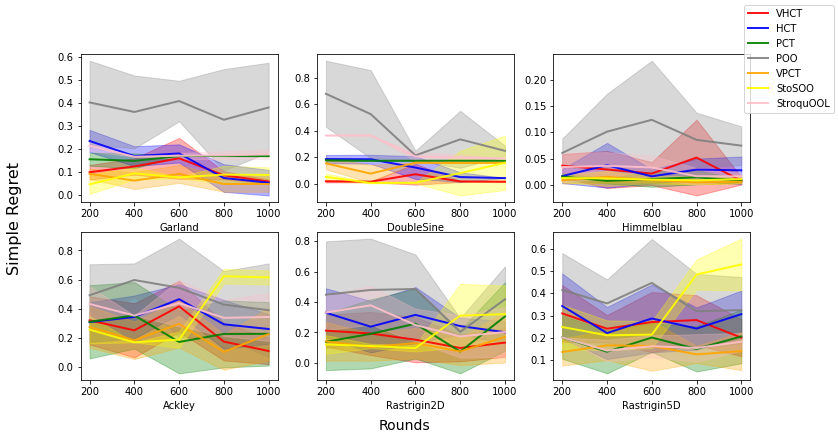

In [5]:

objectives = {"Garland": Garland.Garland(),
              "DoubleSine": DoubleSine.DoubleSine(),
              "Himmelblau": Himmelblau.Himmelblau_Normalized(),
              "Ackley": Ackley.Ackley_Normalized(),
              "Rastrigin2D": Rastrigin.Rastrigin_Normalized(),
              "Rastrigin5D": Rastrigin.Rastrigin_Normalized()
             }

domains =    {"Garland": [[0, 1]],
              "DoubleSine":  [[0, 1]],
              "Himmelblau": [[-5, 5], [-5, 5]],
              "Ackley":  [[-1, 1], [-1, 1]],
              "Rastrigin2D": [[-1, 1], [-1, 1]],
              "Rastrigin5D": [[-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1]]
             }

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

i = 0
for name in objectives.keys():
    
    target = objectives[name]
    domain = domains[name]
    partition = BinaryPartition
    rs = [200, 400, 600, 800, 1000]
    noise = 0.1

    trials = 10
    algorithms = ['VHCT', 'HCT', 'PCT', 'POO', 'VPCT', 'StoSOO', 'StroquOOL']
#     algorithms = ['POO', 'StoSOO', 'StroquOOL']
    print("objective: ", name)
    regret_arrays = []
    for algorithm in algorithms:
        regret_array = []
        for _ in range(trials):
            regret_list = []
            for r in rs:
                regret_list.append(main(algo_name=algorithm, target=target, domain=domain, partition=partition, noise=noise, rounds=r))
            regret_array.append(regret_list)
        regret_arrays.append(np.array(regret_array))


    regret_dic = {
        "target": name,
        "regret": regret_arrays,
        "labels": algorithms,
        "colors": ["red", "blue", "green", "grey", "orange", "yellow", "pink", "purple"],
    }


    compare_regret_withsd(axes[i//3, i%3], rs, regret_dic)
    i = i + 1

lines_labels = [axes[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)


fig.text(0.5, 0.01, 'Rounds', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Simple Regret', va='center', rotation='vertical', fontsize=16)
plt.show()

# Noiseless Setting

objective:  Garland
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.05753444814224351
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.05753444814224351
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.05753444814224351
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.05753444814224351
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : training
0.05753444814224351
VHCT : training
0.12064532021318697
VHCT : training
0.08426076649981318
VHCT : t

0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
DOO : training
0.0033088122164860456
SequOOL : training
0.02673538447768209
SequOOL : training
0.02673538447768209
SequOOL : training
0.02673538447768209
SequOOL : training
0.02673538447768209
SequOOL : training
0.02673538447768209
SequOOL : training
0.02673538447768209
Sequ

0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : training
0.15872487487969988
VPCT : t

0.024095856741573034
HCT : training
0.008137563641151686
HCT : training
0.16461113061797752
HCT : training
0.012943567854634831
HCT : training
0.021498090765449437
HCT : training
0.022006945663623597
HCT : training
0.012943567854634831
HCT : training
0.007469348693161868
HCT : training
0.0743065308988764
HCT : training
0.007057875729678722
HCT : training
0.05040406645014045
HCT : training
0.0644750702247191
HCT : training
0.04533471954002809
HCT : training
0.050513792573735956
HCT : training
0.009131699465633778
HCT : training
0.0514354920119382
HCT : training
0.006890800561797753
HCT : training
0.006008876843398877
HCT : training
0.012943567854634831
HCT : training
0.007964487825886588
PCT : training
0.012859901685393258
PCT : training
0.010467872191011236
PCT : training
0.010467872191011236
PCT : training
0.006890800561797753
PCT : training
0.006890800561797753
PCT : training
0.023108321629213485
PCT : training
0.0030462715063202246
PCT : training
0.006890800561797753
PCT : training


0.36314060825611993
VHCT : training
0.38972216720441877
VHCT : training
0.15114287270067212
VHCT : training
0.0401688621177759
VHCT : training
0.3579414905417619
VHCT : training
0.36314060825611993
VHCT : training
0.5213536836571125
VHCT : training
0.0647970158342708
VHCT : training
0.0647970158342708
VHCT : training
0.1702901256490569
VHCT : training
0.1702901256490569
VHCT : training
0.004755784399209231
VHCT : training
0.15114287270067212
VHCT : training
0.35398211218527714
VHCT : training
0.1702901256490569
VHCT : training
0.15114287270067212
VHCT : training
0.32502088640646903
VHCT : training
0.0647970158342708
VHCT : training
0.2095052440350819
VHCT : training
0.3702695217313993
VHCT : training
0.08975293055204295
VHCT : training
0.3579414905417619
VHCT : training
0.0647970158342708
VHCT : training
0.0647970158342708
VHCT : training
0.1702901256490569
VHCT : training
0.18303973711174015
VHCT : training
0.1702901256490569
VHCT : training
0.14617326790220883
VHCT : training
0.06479

7.699548325268497e-13
DOO : training
0.558615744506997
DOO : training
7.122616397103143e-16
DOO : training
0.0
DOO : training
6.624033249305923e-14
DOO : training
1.5313625253771757e-13
DOO : training
7.122616397103143e-16
DOO : training
4.273569838261885e-15
DOO : training
2.4216895750150684e-14
DOO : training
6.624033249305923e-14
DOO : training
0.0
DOO : training
1.2393352530959468e-13
DOO : training
1.5669756073626913e-14
DOO : training
0.0
SequOOL : training
0.055636688181115015
SequOOL : training
0.010160950344364861
SequOOL : training
0.08975293055204295
SequOOL : training
0.022892002231547224
SequOOL : training
0.0647970158342708
SequOOL : training
0.3537162969827127
SequOOL : training
0.1702901256490569
SequOOL : training
0.08975293055204295
SequOOL : training
0.08975293055204295
SequOOL : training
0.055636688181115015
SequOOL : training
0.14449936747321418
SequOOL : training
0.1702901256490569
SequOOL : training
0.08975293055204295
SequOOL : training
0.15114287270067212
SequO

0.019127773122178303
VPCT : training
0.04100277312217839
VPCT : training
0.16597785940672627
VPCT : training
0.32517642970336313
VPCT : training
0.2706902731221783
VPCT : training
0.5110780939616923
VPCT : training
0.019127773122178303
VPCT : training
0.14722785940672622
VPCT : training
0.04100277312217839
VPCT : training
0.09236392970336316
VPCT : training
0.14722785940672622
VPCT : training
0.019127773122178303
VPCT : training
0.14722785940672622
VPCT : training
0.07361392970336311
VPCT : training
0.14722785940672622
VPCT : training
0.14722785940672622
VPCT : training
0.14722785940672622
VPCT : training
0.14722785940672622
VPCT : training
0.004828093961692393
VPCT : training
0.004828093961692393
VPCT : training
0.2706902731221783
VPCT : training
0.14722785940672622
VPCT : training
0.14722785940672622
VPCT : training
0.14722785940672622
VPCT : training
0.019127773122178303
VPCT : training
0.019127773122178303
VPCT : training
0.2706902731221783
VPCT : training
0.14722785940672622
VPCT 

0.23194557188134524
PCT : training
0.23194557188134524
PCT : training
0.20625000000000004
PCT : training
0.016401109248871358
PCT : training
0.303125
PCT : training
0.303125
PCT : training
0.20125
PCT : training
0.20625
PCT : training
0.016401109248871358
PCT : training
0.20625000000000004
PCT : training
0.20625
PCT : training
0.23194557188134524
PCT : training
0.23944557188134524
PCT : training
0.303125
PCT : training
0.303125
PCT : training
0.23194557188134524
PCT : training
0.20125
PCT : training
0.23194557188134524
PCT : training
0.20125
PCT : training
0.036945571881345264
PCT : training
0.20625
PCT : training
0.016401109248871358
PCT : training
0.007651109248871322
PCT : training
0.303125
PCT : training
0.303125
PCT : training
0.20625000000000004
PCT : training
0.20125
PCT : training
0.100625
PCT : training
0.303125
PCT : training
0.105625
PCT : training
0.23194557188134524
PCT : training
0.029445571881345244
PCT : training
0.23194557188134524
PCT : training
0.20625
PCT : training

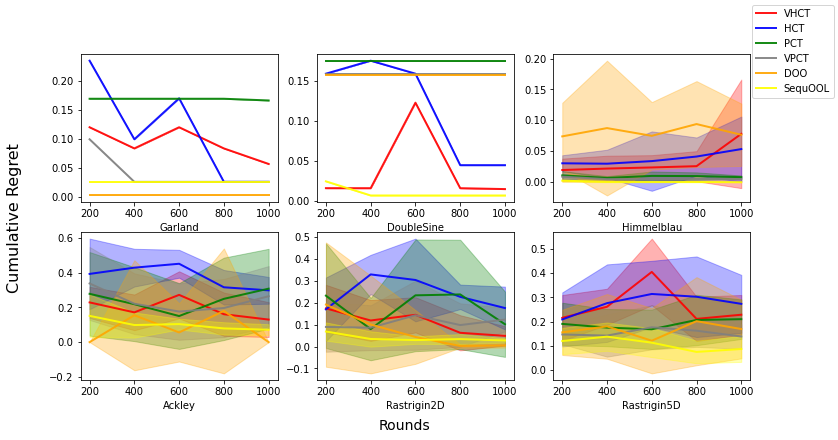

In [6]:

objectives = {"Garland": Garland.Garland(),
              "DoubleSine": DoubleSine.DoubleSine(),
              "Himmelblau": Himmelblau.Himmelblau_Normalized(),
              "Ackley": Ackley.Ackley_Normalized(),
              "Rastrigin2D": Rastrigin.Rastrigin_Normalized(),
              "Rastrigin5D": Rastrigin.Rastrigin_Normalized()
             }

domains =    {"Garland": [[0, 1]],
              "DoubleSine":  [[0, 1]],
              "Himmelblau": [[-5, 5], [-5, 5]],
              "Ackley":  [[-1, 1], [-1, 1]],
              "Rastrigin2D": [[-1, 1], [-1, 1]],
              "Rastrigin5D": [[-1, 1], [-1, 1], [-1, 1], [-1, 1], [-1, 1]]
             }

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

i = 0
for name in objectives.keys():
    
    target = objectives[name]
    domain = domains[name]
    partition = BinaryPartition
    rs = [200, 400, 600, 800, 1000]
    noise = 0

    trials = 10
    algorithms = ['VHCT', 'HCT', 'PCT', 'VPCT', 'DOO', 'SequOOL']
#     algorithms = ['POO', 'StoSOO', 'StroquOOL']
    print("objective: ", name)
    regret_arrays = []
    for algorithm in algorithms:
        regret_array = []
        for _ in range(trials):
            regret_list = []
            for r in rs:
                regret_list.append(main(algo_name=algorithm, target=target, domain=domain, partition=partition, noise=noise, rounds=r))
            regret_array.append(regret_list)
        regret_arrays.append(np.array(regret_array))


    regret_dic = {
        "target": name,
        "regret": regret_arrays,
        "labels": algorithms,
        "colors": ["red", "blue", "green", "grey", "orange", "yellow", "pink", "purple"],
    }


    compare_regret_withsd(axes[i//3, i%3], rs, regret_dic)
    i = i + 1

lines_labels = [axes[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)


fig.text(0.5, 0.01, 'Rounds', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Cumulative Regret', va='center', rotation='vertical', fontsize=16)
plt.show()